In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.proportion as sp


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("Ecom_Data1.csv")
df

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891   7/31/2012   7/31/2012        Same Day   
1       26341    IN-2013-77878    2/5/2013    2/7/2013    Second Class   
2       25330    IN-2013-71249  10/17/2013  10/18/2013     First Class   
3       13524  ES-2013-1579342   1/28/2013   1/30/2013     First Class   
4       47221     SG-2013-4320   11/5/2013   11/6/2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366   6/19/2014   6/19/2014        Same Day   
51286   35398   US-2014-102288   6/20/2014   6/24/2014  Standard Class   
51287   40470   US-2013-155768   12/2/2013   12/2/2013        Same Day   
51288    9596   MX-2012-140767   2/18/2012   2/22/2012  Standard Class   
51289    6147   MX-2012-134460   5/22/2012   5/26/2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        São Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845         933.57        Critical  
1          0.1 -288.7650         923.63        Critical  
2          0.1  919.9710         915.49          Medium  
3          0.1  -96.5400         910.16          Medium  
4          0.0  311.5200         903.04        Critical  
...        ...       ...            ...             ...  
51285    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
df.shape

(51290, 24)

In [ ]:
df

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891   7/31/2012   7/31/2012        Same Day   
1       26341    IN-2013-77878    2/5/2013    2/7/2013    Second Class   
2       25330    IN-2013-71249  10/17/2013  10/18/2013     First Class   
3       13524  ES-2013-1579342   1/28/2013   1/30/2013     First Class   
4       47221     SG-2013-4320   11/5/2013   11/6/2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366   6/19/2014   6/19/2014        Same Day   
51286   35398   US-2014-102288   6/20/2014   6/24/2014  Standard Class   
51287   40470   US-2013-155768   12/2/2013   12/2/2013        Same Day   
51288    9596   MX-2012-140767   2/18/2012   2/22/2012  Standard Class   
51289    6147   MX-2012-134460   5/22/2012   5/26/2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        São Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845         933.57        Critical  
1          0.1 -288.7650         923.63        Critical  
2          0.1  919.9710         915.49          Medium  
3          0.1  -96.5400         910.16          Medium  
4          0.0  311.5200         903.04        Critical  
...        ...       ...            ...             ...  
51285    

In [ ]:
df.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [ ]:
df.isnull().sum().sort_values(ascending= False)

Postal Code       41296
Row ID                0
Region                0
Shipping Cost         0
Profit                0
Discount              0
Quantity              0
Sales                 0
Product Name          0
Sub-Category          0
Category              0
Product ID            0
Market                0
Order ID              0
Country               0
State                 0
City                  0
Segment               0
Customer Name         0
Customer ID           0
Ship Mode             0
Ship Date             0
Order Date            0
Order Priority        0
dtype: int64

In [ ]:
round(100.1234567898, 2)

100.12

In [ ]:
len(df.index)

51290

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Row ID             0.00
Order ID           0.00
Order Date         0.00
Ship Date          0.00
Ship Mode          0.00
Customer ID        0.00
Customer Name      0.00
Segment            0.00
City               0.00
State              0.00
Country            0.00
Postal Code       80.51
Market             0.00
Region             0.00
Product ID         0.00
Category           0.00
Sub-Category       0.00
Product Name       0.00
Sales              0.00
Quantity           0.00
Discount           0.00
Profit             0.00
Shipping Cost      0.00
Order Priority     0.00
dtype: float64

In [ ]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
df.isnull().mean()

Row ID            0.000000
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Ship Mode         0.000000
Customer ID       0.000000
Customer Name     0.000000
Segment           0.000000
City              0.000000
State             0.000000
Country           0.000000
Postal Code       0.805147
Market            0.000000
Region            0.000000
Product ID        0.000000
Category          0.000000
Sub-Category      0.000000
Product Name      0.000000
Sales             0.000000
Quantity          0.000000
Discount          0.000000
Profit            0.000000
Shipping Cost     0.000000
Order Priority    0.000000
dtype: float64

In [ ]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col

['Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Order Priority']

In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
num_col

['Row ID',
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost']

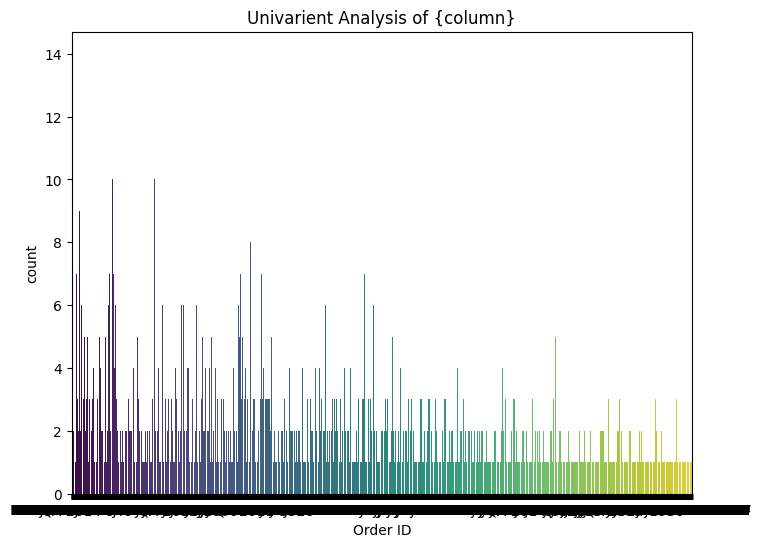

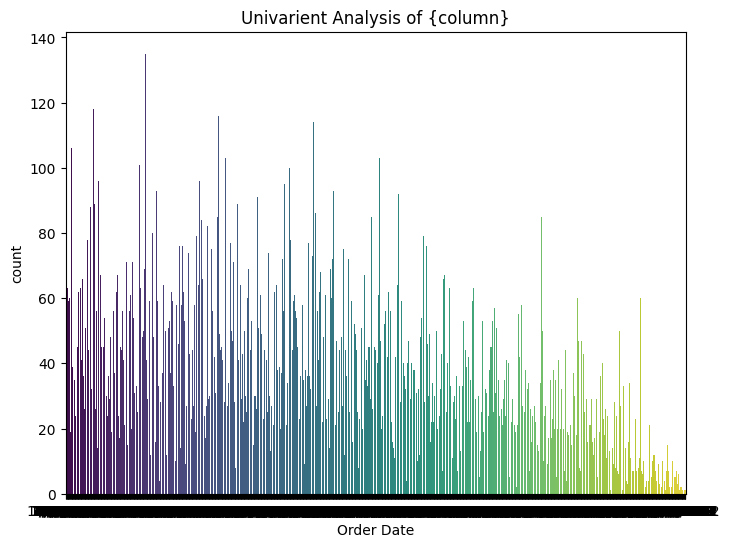

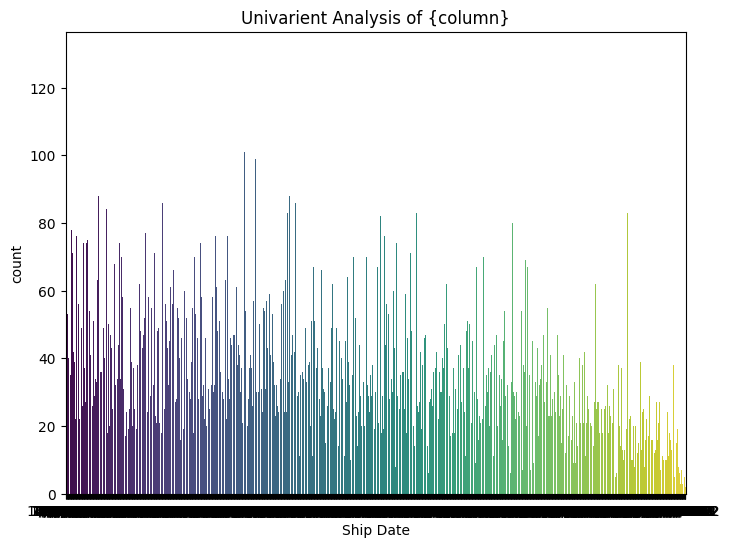

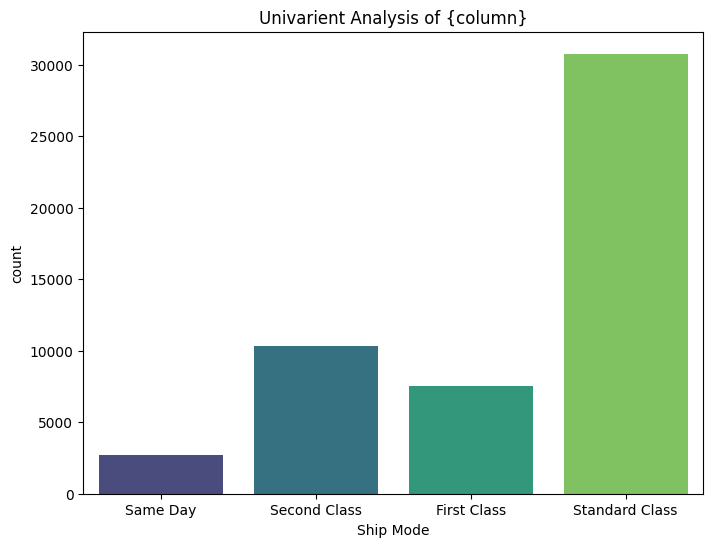

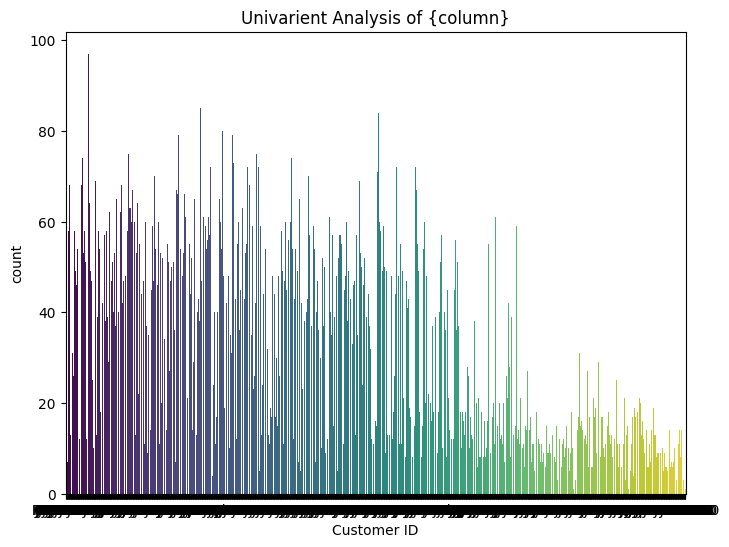

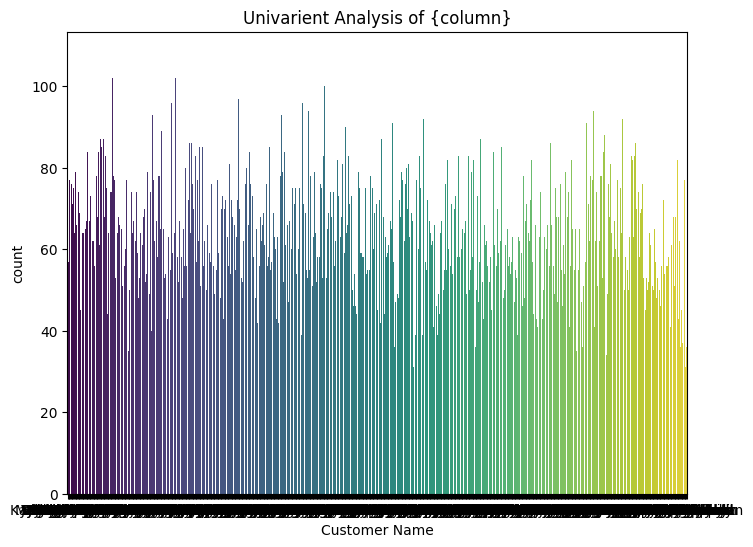

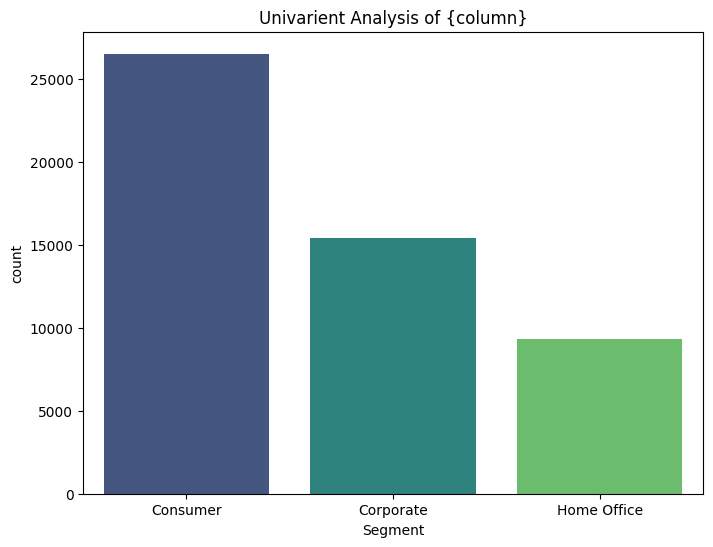

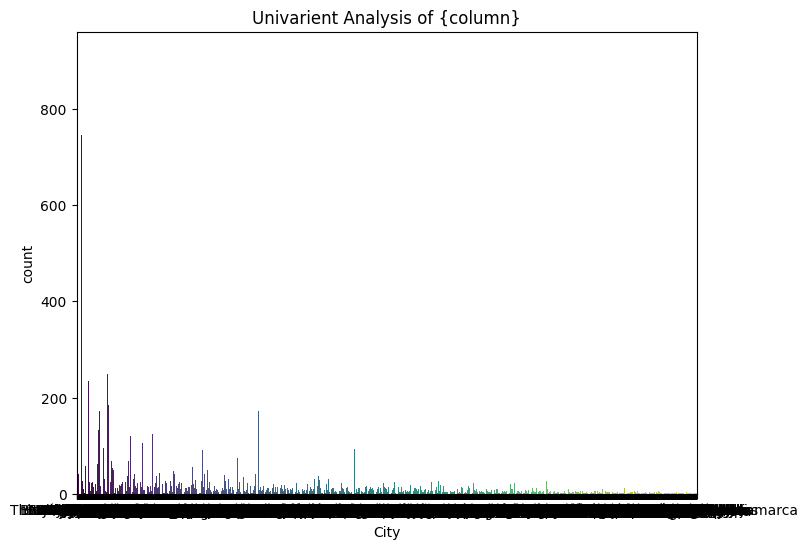

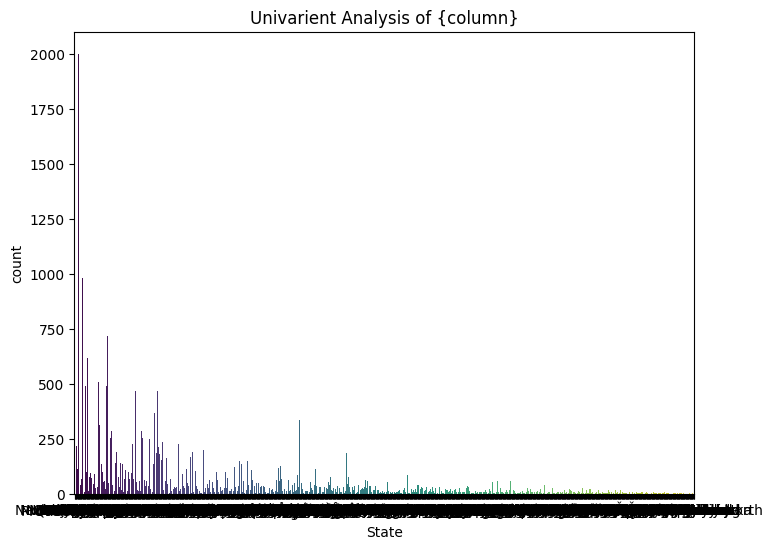

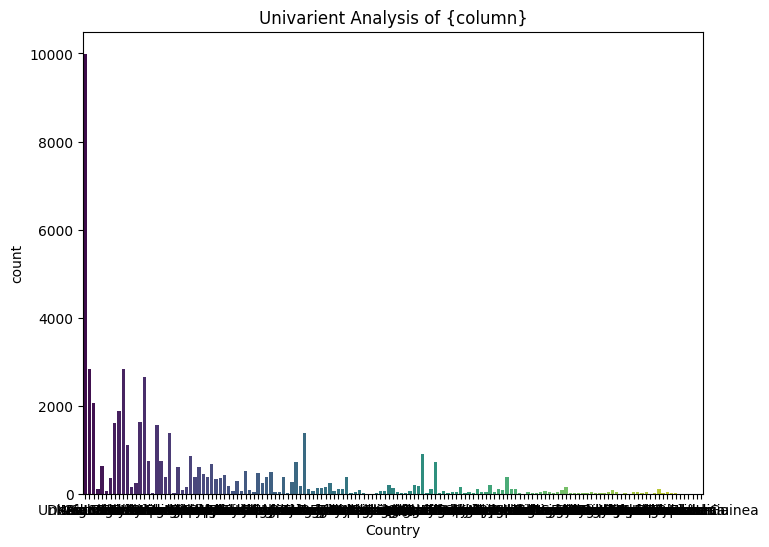

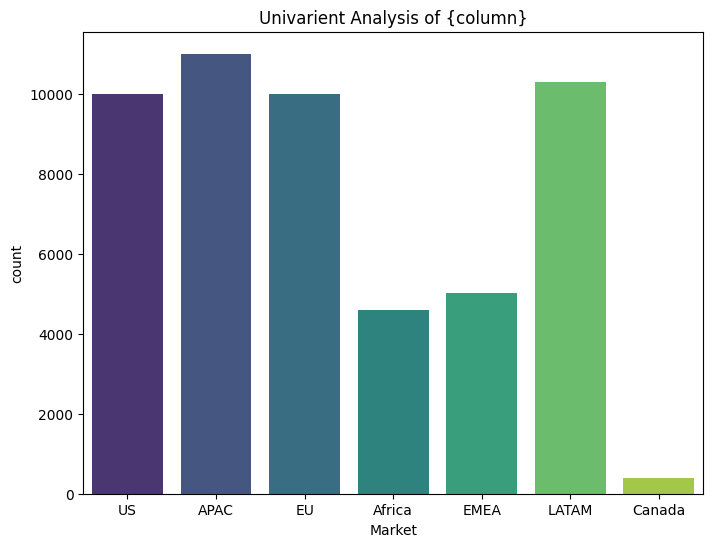

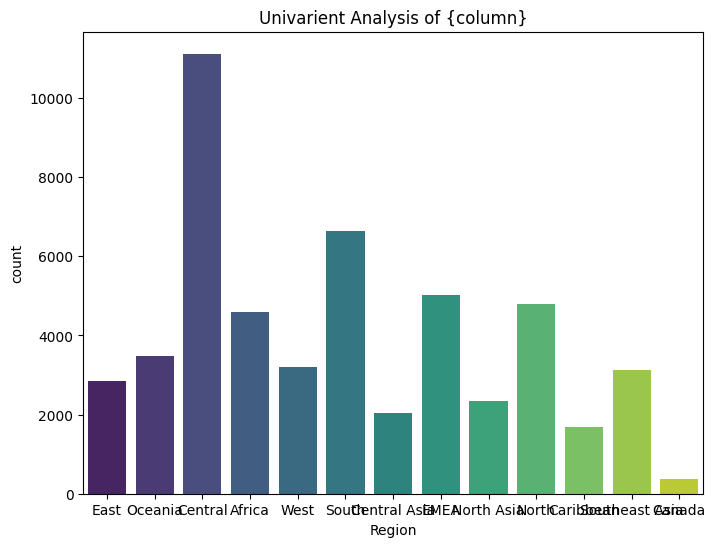

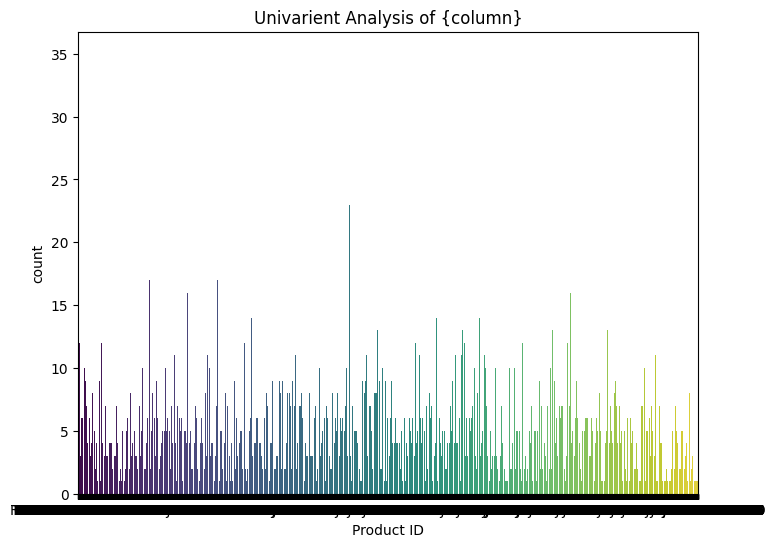

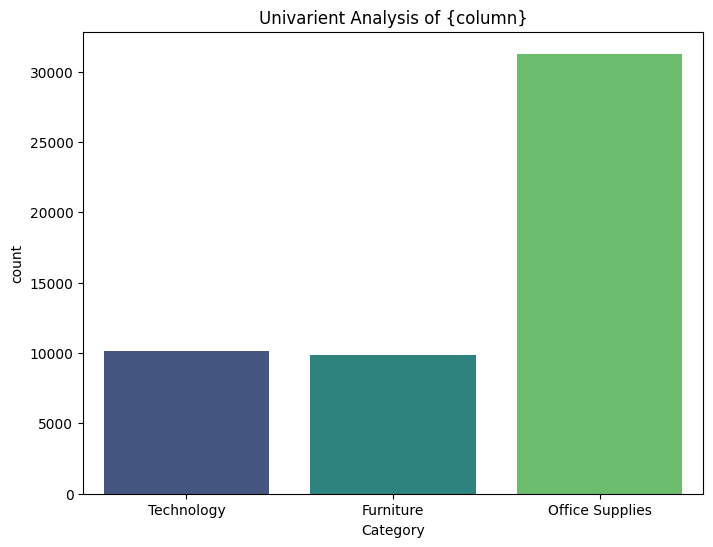

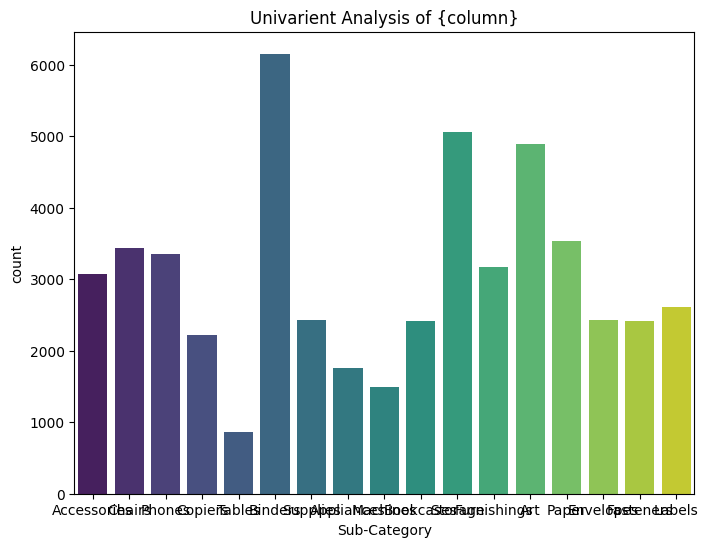

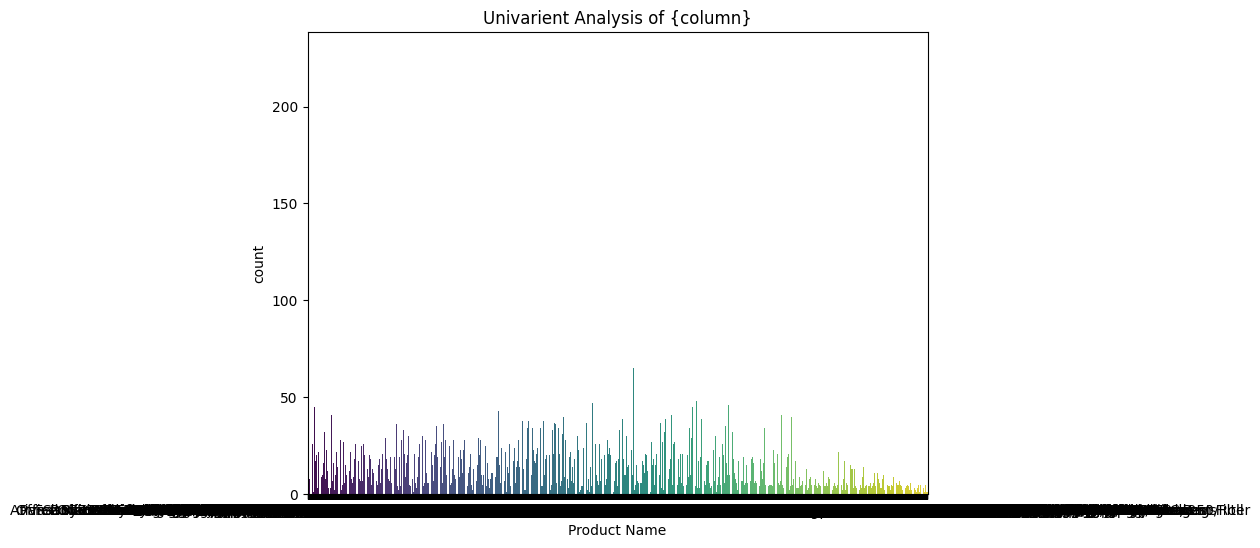

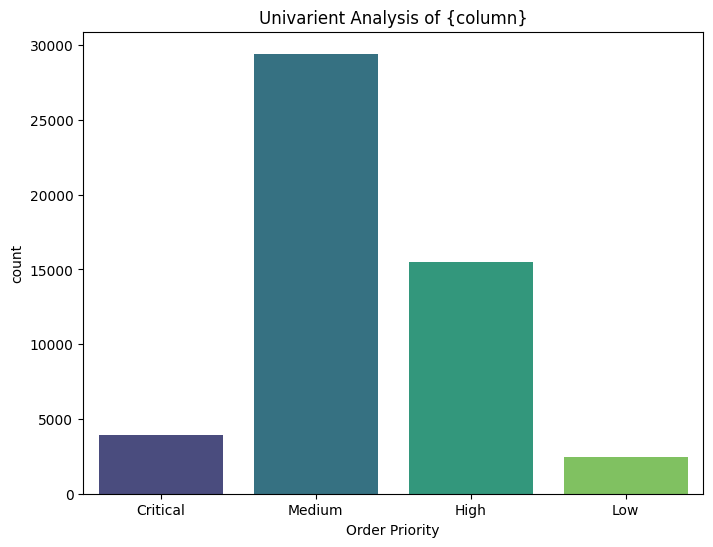

In [ ]:
for column in cat_col:
  plt.figure(figsize = (8, 6))
  sns.countplot(x = column, data = df, palette = 'viridis')
  plt.title("Univarient Analysis of {column}")
  plt.show()

In [ ]:
df[num_col].describe().T

count          mean           std       min           25%  \
Row ID         51290.0  25645.500000  14806.291990     1.000  12823.250000   
Postal Code     9994.0  55190.379428  32063.693350  1040.000  23223.000000   
Sales          51290.0    246.490581    487.565361     0.444     30.758625   
Quantity       51290.0      3.476545      2.278766     1.000      2.000000   
Discount       51290.0      0.142908      0.212280     0.000      0.000000   
Profit         51290.0     28.610982    174.340972 -6599.978      0.000000   
Shipping Cost  51290.0     26.375907     57.296805     0.000      2.610000   

                     50%         75%        max  
Row ID         25645.500  38467.7500  51290.000  
Postal Code    56430.500  90008.0000  99301.000  
Sales             85.053    251.0532  22638.480  
Quantity           3.000      5.0000     14.000  
Discount           0.000      0.2000      0.850  
Profit             9.240     36.8100   8399.976  
Shipping Cost      7.790     24.4500    933.570

In [ ]:
for i in df[cat_col].columns:
  x = df[i].unique()
  print(f"{i} : {x}")
  print()

Order ID : ['CA-2012-124891' 'IN-2013-77878' 'IN-2013-71249' ... 'IN-2014-72327'
 'IN-2014-57662' 'MX-2012-134460']

Order Date : ['7/31/2012' '2/5/2013' '10/17/2013' ... '7/7/2013' '5/27/2012' '2/6/2011']

Ship Date : ['7/31/2012' '2/7/2013' '10/18/2013' ... '7/23/2012' '4/8/2012' '1/5/2011']

Ship Mode : ['Same Day' 'Second Class' 'First Class' 'Standard Class']

Customer ID : ['RH-19495' 'JR-16210' 'CR-12730' ... 'RC-9825' 'MG-7890' 'ZC-11910']

Customer Name : ['Rick Hansen' 'Justin Ritter' 'Craig Reiter' 'Katherine Murray'
 'Jim Mitchum' 'Toby Swindell' 'Mick Brown' 'Jane Waco' 'Joseph Holt'
 'Greg Maxwell' 'Anthony Jacobs' 'Magdelene Morse' 'Vicky Freymann'
 'Peter Fuller' 'Ben Peterman' 'Thomas Boland' 'Patrick Jones' 'Jim Sink'
 'Ritsa Hightower' 'Ann Blume' 'Sue Ann Reed' 'Jason Klamczynski'
 'Laurel Beltran' 'Naresj Patel' 'Valerie Dominguez' 'Phillip Breyer'
 'Eugene Barchas' 'Karen Ferguson' 'Benjamin Patterson' 'Rick Reed'
 'Bill Shonely' 'Joel Eaton' 'Dave Poirier' 'Nora 

<Axes: xlabel='Sales', ylabel='Discount'>

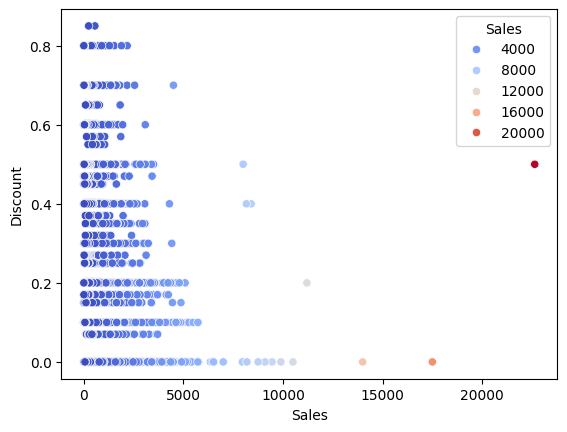

In [ ]:
sns.scatterplot(x = 'Sales', y = 'Discount', data= df, hue = 'Sales', palette = "coolwarm")


In [ ]:
df

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891   7/31/2012   7/31/2012        Same Day   
1       26341    IN-2013-77878    2/5/2013    2/7/2013    Second Class   
2       25330    IN-2013-71249  10/17/2013  10/18/2013     First Class   
3       13524  ES-2013-1579342   1/28/2013   1/30/2013     First Class   
4       47221     SG-2013-4320   11/5/2013   11/6/2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366   6/19/2014   6/19/2014        Same Day   
51286   35398   US-2014-102288   6/20/2014   6/24/2014  Standard Class   
51287   40470   US-2013-155768   12/2/2013   12/2/2013        Same Day   
51288    9596   MX-2012-140767   2/18/2012   2/22/2012  Standard Class   
51289    6147   MX-2012-134460   5/22/2012   5/26/2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        São Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845         933.57        Critical  
1          0.1 -288.7650         923.63        Critical  
2          0.1  919.9710         915.49          Medium  
3          0.1  -96.5400         910.16          Medium  
4          0.0  311.5200         903.04        Critical  
...        ...       ...            ...             ...  
51285    

In [ ]:
cross_tab = pd.crosstab(df['Country'], df['Customer Name'], normalize = 'index')
cross_tab.plot(kind = 'bar', stacked = True, color = ['skyblue', 'lightcoral'], figsize = (50, 20))
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Country-Customer Name")
plt.show()

In [ ]:
df.Country.value_counts(normalize = True)

Country
United States    0.194853
Australia        0.055313
France           0.055118
Mexico           0.051550
Germany          0.040261
                   ...   
Bahrain          0.000039
South Sudan      0.000039
Chad             0.000039
Burundi          0.000039
Eritrea          0.000039
Name: proportion, Length: 147, dtype: float64

In [ ]:
df['Customer Name'].value_counts(normalize = True)

Customer Name
Muhammed Yedwab    0.002106
Steven Ward        0.002067
Gary Hwang         0.001989
Patrick O'Brill    0.001989
Bill Eplett        0.001989
                     ...   
Emily Burns        0.000682
David Bremer       0.000663
Darren Budd        0.000604
Nicole Brennan     0.000604
Michael Oakman     0.000565
Name: proportion, Length: 795, dtype: float64

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

<Axes: xlabel='Category', ylabel='Sales'>

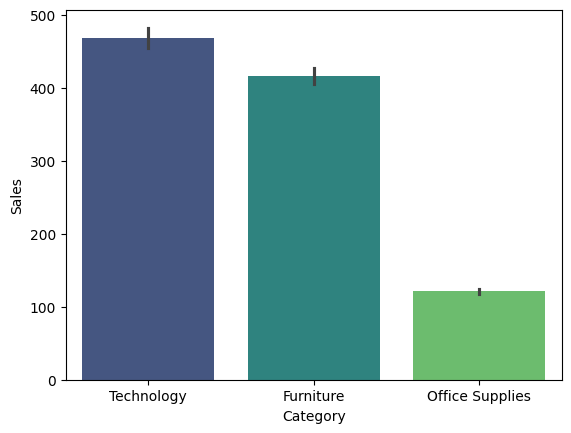

In [ ]:
sns.barplot(x = 'Category', y = 'Sales', data = df, palette = 'viridis')


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

<Axes: xlabel='Quantity', ylabel='Shipping Cost'>

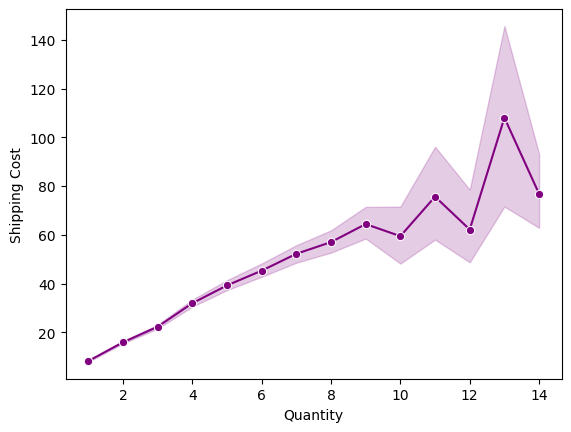

In [ ]:
sns.lineplot(x = 'Quantity', y = 'Shipping Cost', data = df, marker = 'o', color = 'purple')

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
sns.violinplot(x = 'Shipping Cost', y = 'Order Priority', data = df, hue = "Sales")


In [ ]:
sns.swarmplot(x='Shipping Cost', y='Order Priority', data=df, hue='Sales', palette='coolwarm')

In [ ]:
num_col

['Row ID',
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost']

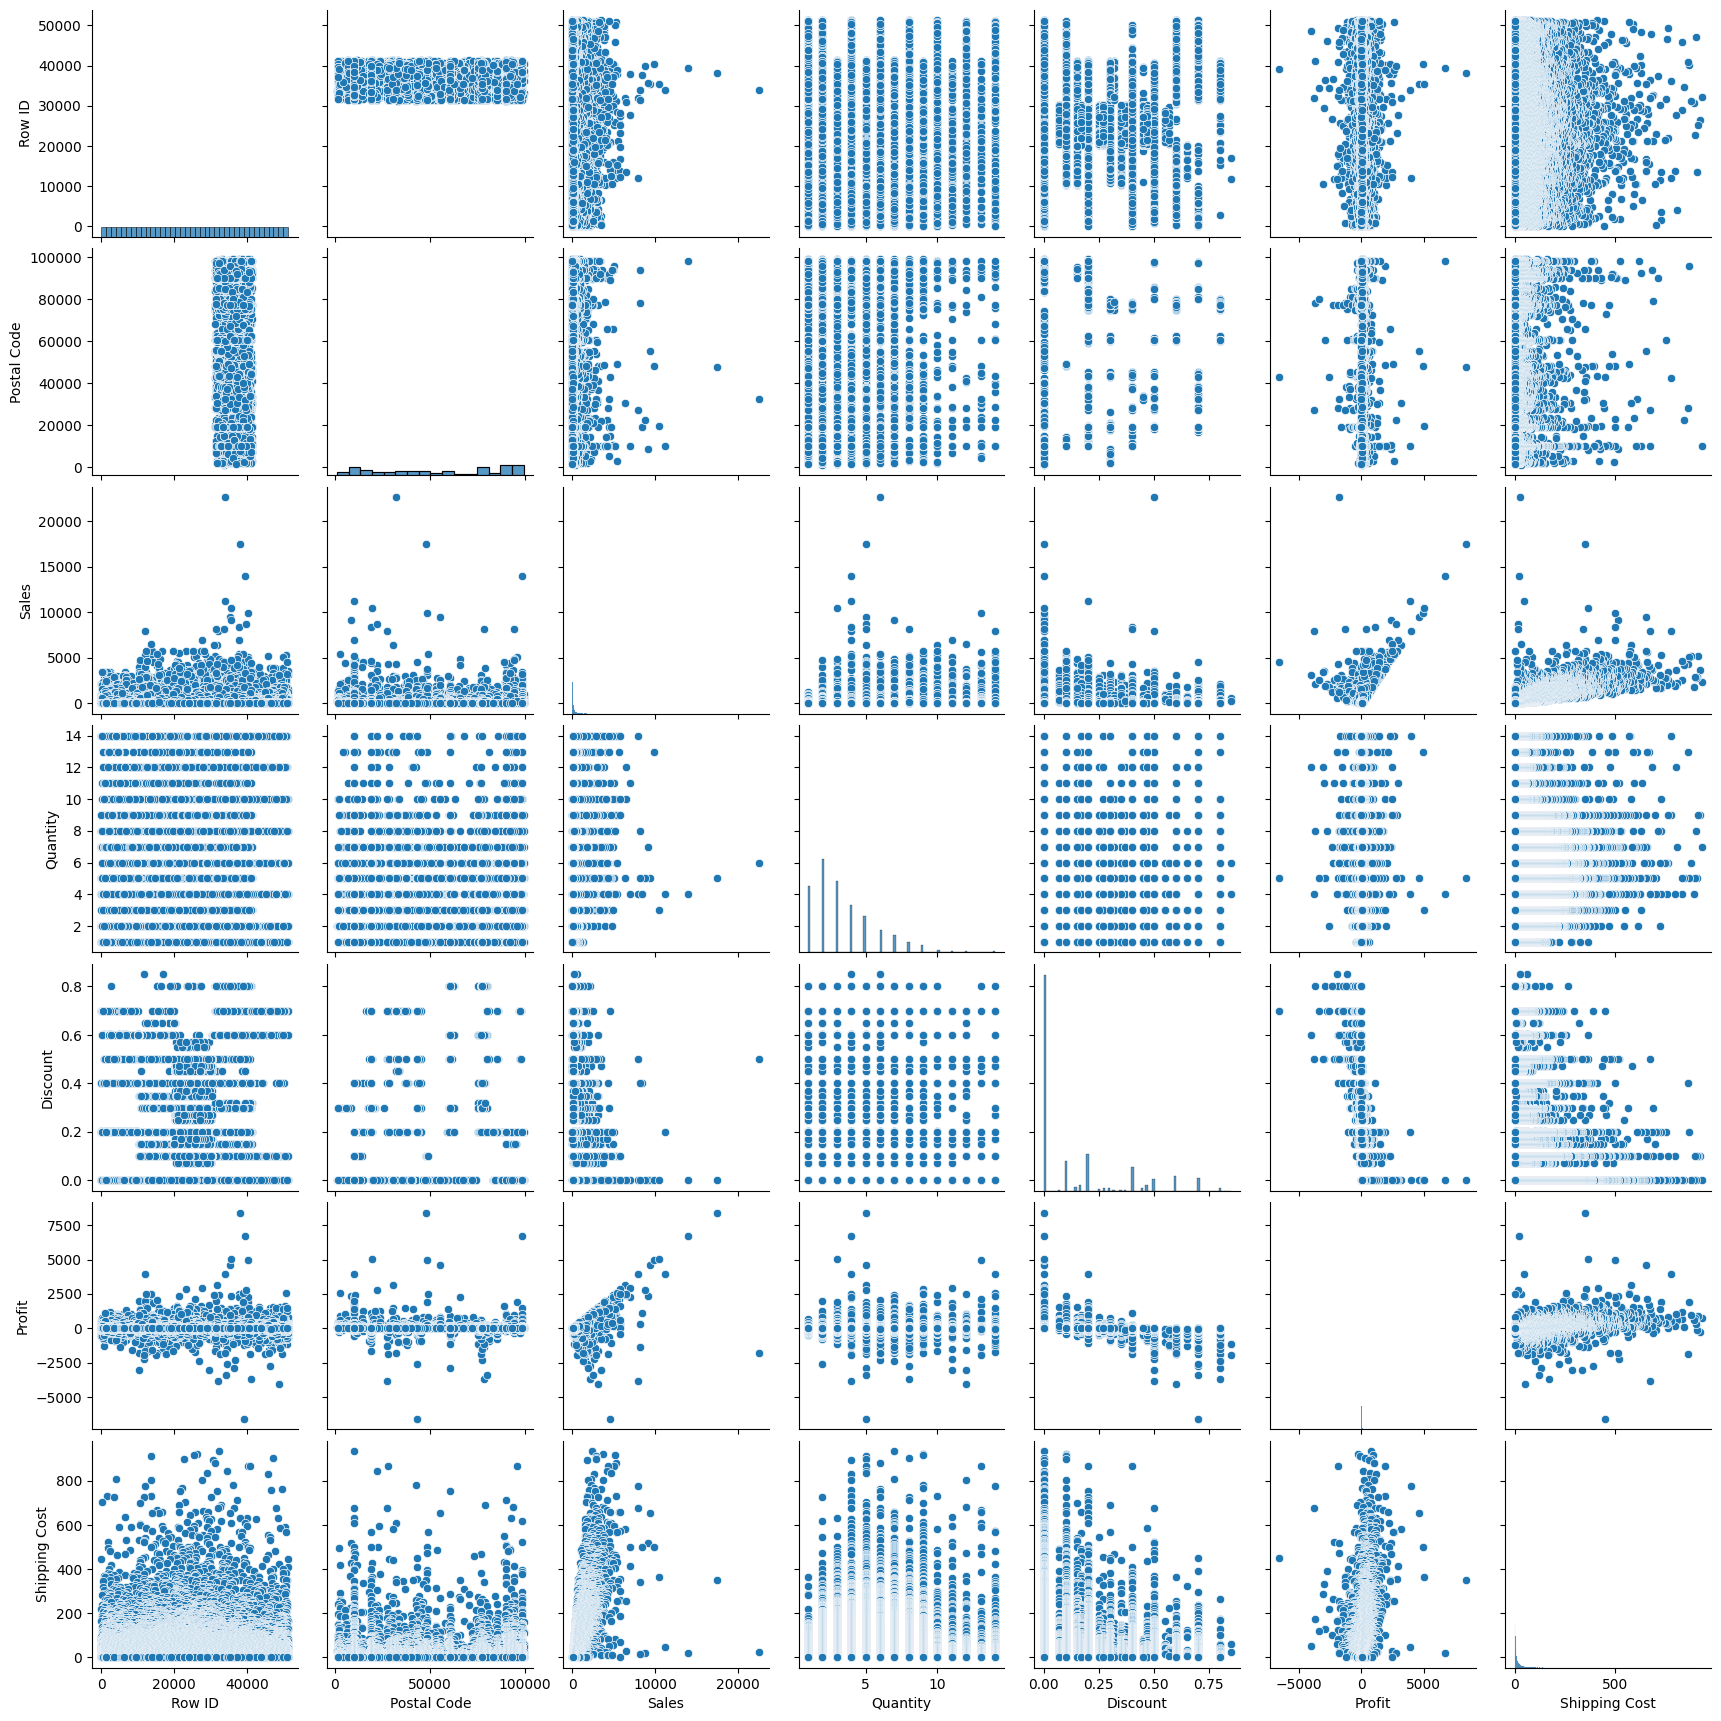

In [ ]:
sns.pairplot(df[num_col])

In [ ]:
corr_df = df[num_col].corr()
corr_df

Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.009671 -0.043889 -0.173483  0.087594 -0.019037   
Postal Code    0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961   
Sales         -0.043889    -0.023854  1.000000  0.313577 -0.086722  0.484918   
Quantity      -0.173483     0.012761  0.313577  1.000000 -0.019875  0.104365   
Discount       0.087594     0.058443 -0.086722 -0.019875  1.000000 -0.316490   
Profit        -0.019037    -0.029961  0.484918  0.104365 -0.316490  1.000000   
Shipping Cost -0.039078    -0.025449  0.768073  0.272649 -0.079056  0.354441   

               Shipping Cost  
Row ID             -0.039078  
Postal Code        -0.025449  
Sales               0.768073  
Quantity            0.272649  
Discount           -0.079056  
Profit              0.354441  
Shipping Cost       1.000000

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

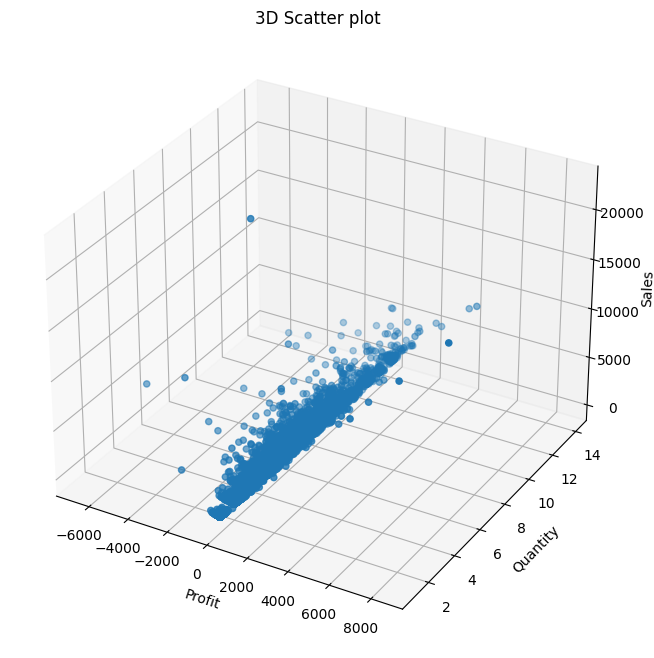

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Profit'], df['Quantity'], df['Sales'])

ax.set_xlabel('Profit')
ax.set_ylabel('Quantity')
ax.set_zlabel('Sales')

ax.set_title("3D Scatter plot")
plt.show()


